In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ,BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,execute

from qiskit.tools.visualization import plot_histogram

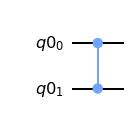

In [2]:
def phase_oracle(circuit,register):
    circuit.cz(register[0],register[1])

qr = QuantumRegister(2)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit,qr)
oracleCircuit.draw(output='mpl')

In [3]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm"""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0],register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

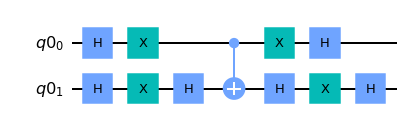

In [4]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage,qr)
qAverage.draw('mpl')

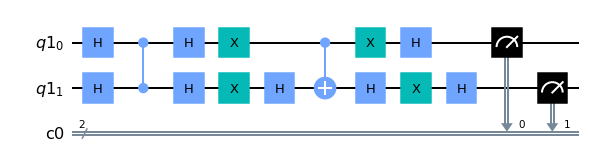

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

phase_oracle(groverCircuit,qr)
inversion_about_average(groverCircuit,qr)

groverCircuit.measure(qr,cr)
groverCircuit.draw('mpl')

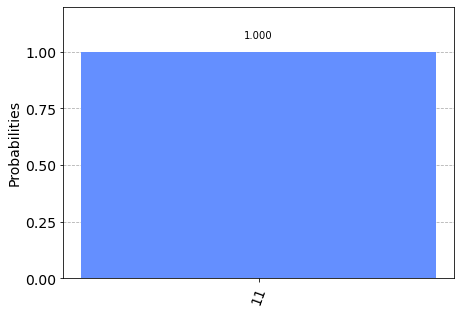

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit,backend=backend,shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## QISKIT Implementation: 2 qubit Grover's algorithm using auxiliary bits

We are going to find the state $|11\rangle$ just like in the previous example, but this time we us e an auxiliary bit. Auxiliary bits let you work with more qubits or implement more complex oracles.  
Let us prepare the environment first.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ,BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,execute

from qiskit.tools.visualization import plot_histogram

We will create an oracle that will flip the phase of the answer we are looking for (in this case $|11\rangle$). This time, using the auxiliary bit to make the target bit's phase flip when the input state is $|11\rangle$. Note that in order to make this phase flip work, you need to prepare the auxiliary bit to be $|1\rangle$ by using an x gate.

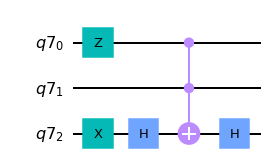

In [8]:
def phase_oracle(circuit,register,oracle_register):
    circuit.z(0)
    circuit.h(oracle_register)
    circuit.ccx(register[0],register[1],oracle_register)
    circuit.h(oracle_register)

qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit,qr,qr[2])
oracleCircuit.draw('mpl')

Next we prepare the amplitude amplification module/diffusion circuit. Make sure that the circuit does not act on the auxiliary bit.

In [9]:
def inversion_about_average(circuit,register):
    """Apply inversion about the average step of Grover's algorithm"""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0],register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

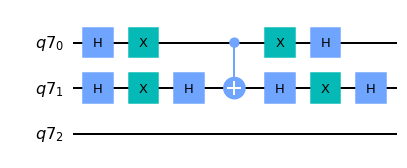

In [10]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage,qr[0:2])
qAverage.draw('mpl')

Just like we did in the previous example without using the auxiliary bit, we first create a uniform superposition by using the Hadamard (H gate), incorporate the transformation and then take measurement. Again, make sure that you do not apply the H gate to your auxiliary bit.

In [11]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

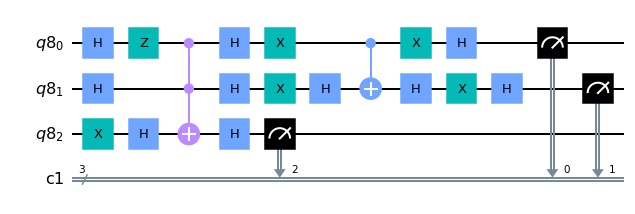

In [12]:
phase_oracle(groverCircuit,qr,qr[2])
inversion_about_average(groverCircuit,qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw('mpl')

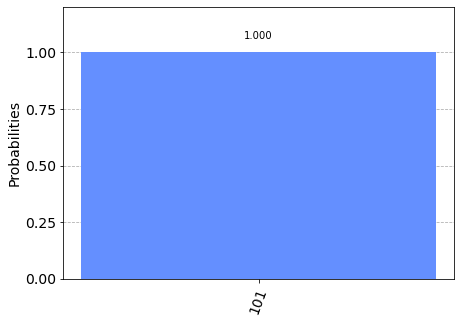

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

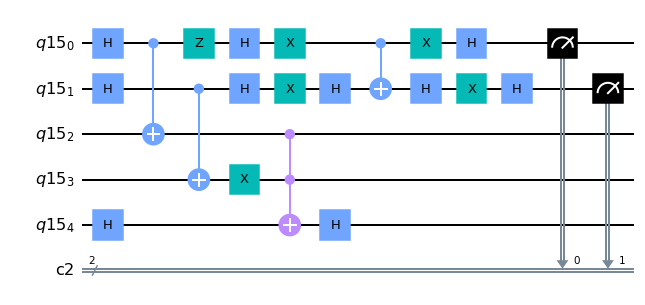

In [14]:
qr = QuantumRegister(5)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.cx(qr[0],qr[2])
groverCircuit.cx(qr[1],qr[3])
groverCircuit.x(qr[3])

phase_oracle(groverCircuit,qr[2:4],qr[4])
inversion_about_average(groverCircuit,qr[0:2])

groverCircuit.measure(qr[0:2],cr)
groverCircuit.draw('mpl')

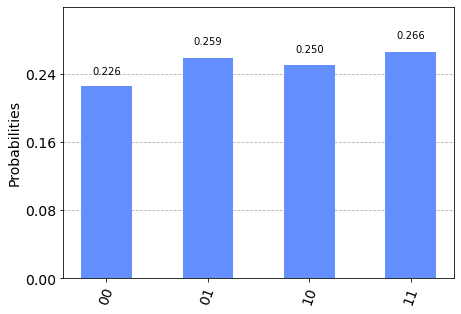

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

We can see how the state $|11\rangle$ is being amplified just like we saw previously without using the auxiliary bit. You can ignore the 1 in the highest order, as that comes from the auxiliary bit.

## Tips: Number of Iterations
I mentioned that the number of Grover algorithm iterations to be performed before the solution is fully amplified is approximately $\sqrt{N}$. Let's go further and think about the number of times the solution is amplified the most.  
For example, when running Grover's algorithm on a database with $N = 2^4$, the probabilities obtained by changing the number of iterations are as follows:

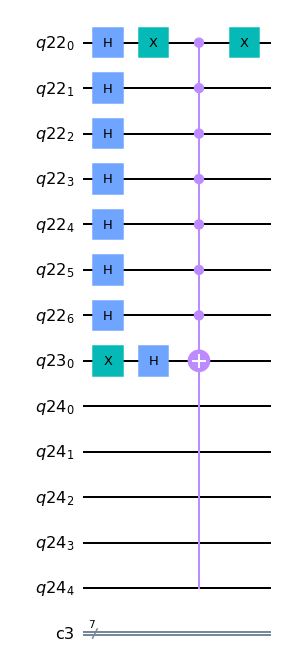

In [16]:
datab = QuantumRegister(7)
orcl = QuantumRegister(1)
aux = QuantumRegister(5)
clr = ClassicalRegister(7)
tmp_qc = QuantumCircuit(datab,orcl,aux,clr)
tmp_qc.h(datab[:])
tmp_qc.x(orcl[0])
tmp_qc.h(orcl[0])

tmp_qc.x(datab[0])
tmp_qc.mct(datab[:], orcl[0], aux[:], mode='basic') 
tmp_qc.x(datab[0])
tmp_qc.draw('mpl')


In [17]:
backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(15):
    database = QuantumRegister(7)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(5) 
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_4q
        # search 63: 0111111 
        qc.x(database[0])
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic') 
        qc.x(database[0])

    # diffusion_4q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[6])
        qc.mct(database[0:6], database[6], auxiliary[:], mode='basic')
        qc.h(database[6])
        qc.x(database[:])
        qc.h(database[:])


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    # Change the endian 
    qc = qc.reverse_bits() 
    
    job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count['0111111']
    prob_of_ans.append(answer)

Text(0, 0.5, '# of times the solution was obtained')

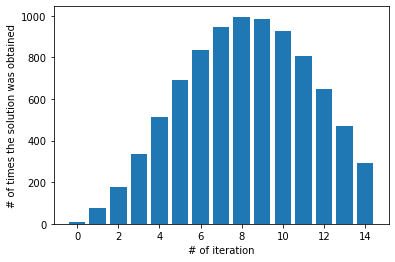

In [18]:
import numpy as np
import matplotlib.pyplot as plt
iteration = [i for i in range(15)]
correct = prob_of_ans
plt.bar(iteration,correct)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')